In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pickle
import numpy as np



#f = open('driftExplorerNoBombDurGrid.pickle', 'rb')
f = open('stadiumNoBombClusteringTests.pickle', 'rb')
data = pickle.load(f)

In [12]:
print(data['var'])
print(data['order'])

{'totalNodes': [500, 1000, 2000, 3500], 'clusterMaxThresh': [20, 40], 'clusterMinThresh': [0, 2], 'localRecluster': [0, 1, 2, 3], 'reclusterPeriod': [5, 30, 90]}
['totalNodes', 'clusterMaxThresh', 'clusterMinThresh', 'localRecluster', 'reclusterPeriod']


In [13]:
data['data'].keys()

dict_keys([(500, 40, 0, 1, 90), (500, 40, 0, 0, 5), (2000, 20, 0, 1, 90), (1000, 20, 2, 0, 90), (1000, 20, 0, 2, 90), (1000, 20, 0, 0, 30), (2000, 20, 2, 0, 30), (3500, 20, 0, 0, 30), (3500, 20, 0, 1, 30), (500, 40, 2, 3, 90), (1000, 20, 2, 3, 30), (1000, 20, 0, 1, 5), (1000, 40, 0, 0, 30), (3500, 40, 0, 2, 5), (1000, 40, 0, 3, 30), (3500, 20, 2, 2, 90), (3500, 40, 2, 0, 30), (3500, 20, 2, 3, 5), (500, 20, 0, 3, 5), (2000, 40, 2, 2, 90), (3500, 40, 0, 0, 90), (500, 20, 2, 3, 5), (3500, 20, 2, 3, 30), (2000, 40, 2, 1, 5), (1000, 40, 0, 1, 90), (2000, 20, 2, 1, 5), (3500, 20, 0, 1, 90), (2000, 40, 0, 2, 5), (500, 20, 0, 2, 5), (3500, 20, 2, 0, 5), (500, 20, 2, 0, 5), (500, 40, 2, 1, 30), (500, 40, 0, 0, 30), (3500, 20, 2, 1, 5), (3500, 20, 2, 0, 90), (3500, 40, 2, 3, 90), (2000, 40, 0, 3, 30), (3500, 20, 0, 2, 30), (2000, 20, 0, 3, 30), (2000, 40, 2, 2, 5), (2000, 20, 0, 2, 90), (2000, 40, 2, 3, 5), (2000, 40, 2, 3, 30), (500, 20, 2, 1, 90), (2000, 40, 0, 0, 5), (500, 20, 2, 0, 90), (500

In [14]:
data['data'][(2000, 20, 0, 2, 90)][0]['Percent Nodes Dead']

0.0

In [23]:
def compareLocalReclusteringMethods():
    stats = {}
    stats['offPercent'] = 0
    stats['offAvg'] = 0
    stats['minPercent'] = 0
    stats['minAvg'] = 0
    stats['stdPercent'] = 0
    stats['stdAvg'] = 0
    stats['expPercent'] = 0
    stats['expAvg'] = 0
    for key in data['data'].keys():
        if key[3] == 0:
            for run in data['data'][key]:
                stats['offPercent'] += run['Percent Nodes Dead']
                stats['offAvg'] += run['Average Remaining Battery']
        elif key[3] == 1:
            for run in data['data'][key]:
                stats['minPercent'] += run['Percent Nodes Dead']
                stats['minAvg'] += run['Average Remaining Battery']
        elif key[3] == 2:
            for run in data['data'][key]:
                stats['stdPercent'] += run['Percent Nodes Dead']
                stats['stdAvg'] += run['Average Remaining Battery']
        elif key[3] == 3:
            for run in data['data'][key]:
                stats['expPercent'] += run['Percent Nodes Dead']
                stats['expAvg'] += run['Average Remaining Battery']
    for stat in stats.keys():
        print(stat + ": " + str(stats[stat] / (768/4)))
    
compareLocalReclusteringMethods()

offPercent: 0.06521800595238095
offAvg: 0.3652870593654949
minPercent: 0.0644813988095238
minAvg: 0.36056939810928196
stdPercent: 0.06518638392857146
stdAvg: 0.36103025445039044
expPercent: 0.06443489583333332
expAvg: 0.3616069182301636


In [27]:
def compareGlobalReclusteringPeriods():
    stats = {}
    stats['5Percent'] = 0
    stats['5Avg'] = 0
    stats['30Percent'] = 0
    stats['30Avg'] = 0
    stats['90Percent'] = 0
    stats['90Avg'] = 0
    for key in data['data'].keys():
        if key[4] == 5:
            for run in data['data'][key]:
                stats['5Percent'] += run['Percent Nodes Dead']
                stats['5Avg'] += run['Average Remaining Battery']
        elif key[4] == 30:
            for run in data['data'][key]:
                stats['30Percent'] += run['Percent Nodes Dead']
                stats['30Avg'] += run['Average Remaining Battery']
        elif key[4] == 90:
            for run in data['data'][key]:
                stats['90Percent'] += run['Percent Nodes Dead']
                stats['90Avg'] += run['Average Remaining Battery']
    for stat in stats.keys():
        print(stat + ": " + str(stats[stat] / (768/3)))
    
compareGlobalReclusteringPeriods()

5Percent: 0.08471735491071432
5Avg: 0.3537291804122128
30Percent: 0.05109040178571432
30Avg: 0.3670403964429935
90Percent: 0.05868275669642854
90Avg: 0.36560064576129164


In [28]:
def compareClusterMinThresholds():
    stats = {}
    stats['0Percent'] = 0
    stats['0Avg'] = 0
    stats['2Percent'] = 0
    stats['2Avg'] = 0
    for key in data['data'].keys():
        if key[2] == 0:
            for run in data['data'][key]:
                stats['0Percent'] += run['Percent Nodes Dead']
                stats['0Avg'] += run['Average Remaining Battery']
        elif key[2] == 2:
            for run in data['data'][key]:
                stats['2Percent'] += run['Percent Nodes Dead']
                stats['2Avg'] += run['Average Remaining Battery']
    for stat in stats.keys():
        print(stat + ": " + str(stats[stat] / (768/2)))
    
compareClusterMinThresholds()

0Percent: 0.06370442708333332
0Avg: 0.36633355027347836
2Percent: 0.06595591517857145
2Avg: 0.3579132648041871


In [37]:
def compareLocalClusteringAndTotalNodes():
    stats = {}
    for key in data['data'].keys():
        for run in data['data'][key]:
            if '%d-%d' % (key[0], key[3]) in stats.keys():
                stats['%d-%d' % (key[0], key[3])]['Percent'] += run['Percent Nodes Dead']
                stats['%d-%d' % (key[0], key[3])]['Average'] += run['Average Remaining Battery']
                stats['%d-%d' % (key[0], key[3])]['Runs'] += 1
            else:
                stats['%d-%d' % (key[0], key[3])] = {}
                stats['%d-%d' % (key[0], key[3])]['Percent'] = run['Percent Nodes Dead']
                stats['%d-%d' % (key[0], key[3])]['Average'] = run['Average Remaining Battery']
                stats['%d-%d' % (key[0], key[3])]['Runs'] = 1
    for key in stats.keys():
        stats[key]['Percent'] = stats[key]['Percent']/stats[key]['Runs']
        stats[key]['Average'] = stats[key]['Average']/stats[key]['Runs']
    return stats

#print(compareLocalClusteringAndTotalNodes())

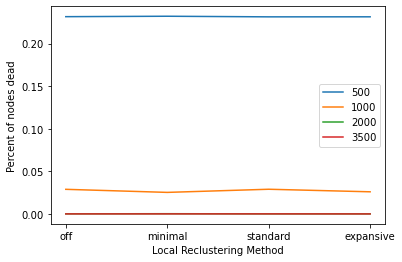

In [50]:
stats = compareLocalClusteringAndTotalNodes()
x = ['off', 'minimal', 'standard', 'expansive']
for nodeCount in data['var']['totalNodes']:
    y = []
    for i in data['var']['localRecluster']:
        y += [stats['%d-%d' % (nodeCount, i)]['Percent']]
    plt.plot(x, y, label='%d' % nodeCount)
plt.xlabel('Local Reclustering Method')
plt.ylabel('Percent of nodes dead')
plt.legend()
plt.show()

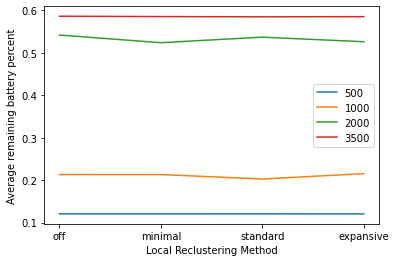

In [49]:
stats = compareLocalClusteringAndTotalNodes()
x = ['off', 'minimal', 'standard', 'expansive']
for nodeCount in data['var']['totalNodes']:
    y = []
    for i in data['var']['localRecluster']:
        y += [stats['%d-%d' % (nodeCount, i)]['Average']]
    plt.plot(x, y, label='%d' % nodeCount)
plt.xlabel('Local Reclustering Method')
plt.ylabel('Average remaining battery percent')
plt.legend()
plt.show()

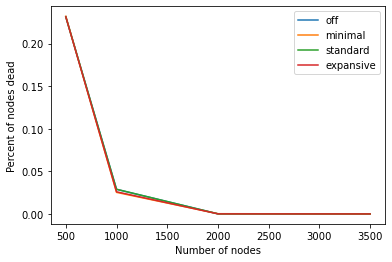

In [60]:
stats = compareLocalClusteringAndTotalNodes()
labels = ['off', 'minimal', 'standard', 'expansive']
for i in data['var']['localRecluster']:
    y = []
    for nodeCount in data['var']['totalNodes']:
        y += [stats['%d-%d' % (nodeCount, i)]['Percent']]
    plt.plot(data['var']['totalNodes'], y, label=labels[i])
plt.xlabel('Number of nodes')
plt.ylabel('Percent of nodes dead')
plt.legend()
plt.show()

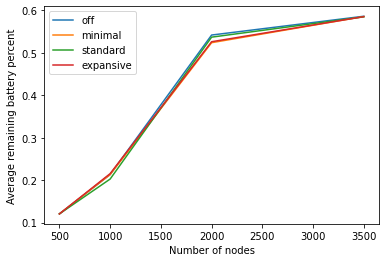

In [61]:
stats = compareLocalClusteringAndTotalNodes()
labels = ['off', 'minimal', 'standard', 'expansive']
for i in data['var']['localRecluster']:
    y = []
    for nodeCount in data['var']['totalNodes']:
        y += [stats['%d-%d' % (nodeCount, i)]['Average']]
    plt.plot(data['var']['totalNodes'], y, label=labels[i])
plt.xlabel('Number of nodes')
plt.ylabel('Average remaining battery percent')
plt.legend()
plt.show()